# Proyecto

## Práctica 3: clustering

#### 4.- Comparar la detección de outliers de la práctica 2 con el resultado de aplicar DBSCAN sobre el conjunto de datos considerado.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random 
import math
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

In [3]:
# carga de datos del fichero horario original
df_bike = pd.read_csv('df_bike_final.csv', sep=',')
df_bike = df_bike.iloc[:,1:]

print("num_rows: %d\tColumnas: %d\n" % (df_bike.shape[0], df_bike.shape[1]) )
print("Columnas:\n", list(df_bike.columns))

num_rows: 17379	Columnas: 15

Columnas:
 ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'cnt', 'season_weather', 'day']


In [4]:
# Lo primero que vamos a hacer es recuperar la variable registered a partir de restar cnt y casual
def f(row):
    return (row['cnt']-row['casual'])

df_bike['registered'] = df_bike.apply(f, axis=1)

In [5]:
# Se observa que el valor máximo de 'cnt' es cercano a 1000, así que vamos a formar una nueva variable que cree a 
# partir de 'cnt' 4 clases distintas según intervalos de valores.
def f(row):
    if row["cnt"] < 250:
        return 0
    elif row["cnt"] >= 250 and row["cnt"] < 500:
        return 1
    elif row["cnt"] >= 500 and row["cnt"] < 750:
        return 2  
    elif row["cnt"] >= 750 and row["cnt"] < 1000:
        return 3
    print(row)

df_bike['cnt_class'] = df_bike.apply(f, axis=1)

In [6]:
df_bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,16,1,1,13.0,0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,40,1,1,32.0,0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,32,1,1,27.0,0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,13,1,1,10.0,0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1,1,1.0,0


In [7]:
df_bike_drop = df_bike

# eliminamos variables no continuas
df_bike_drop.drop(["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit",\
                   "season_weather", "day", "cnt_class"], axis = 1, inplace = True)

In [8]:
df_bike_drop.head()

,temp,hum,windspeed,casual,cnt,registered
0,0.24,0.81,0.0,3,16,13.0
1,0.22,0.80,0.0,8,40,32.0
2,0.22,0.80,0.0,5,32,27.0
3,0.24,0.75,0.0,3,13,10.0
4,0.24,0.75,0.0,0,1,1.0


In [9]:
# se pasan los datos a matriz quedándonos con 2 atributos que queremos representar, los atributos casual y registered
# que indican el uso del servicio y son las variables con mayor importancia.
data = df_bike_drop[["casual", "registered"]]
data_m = data.as_matrix().astype("float32", copy = False)

In [10]:
# escalado de las variables
stscaler = StandardScaler().fit(data_m)
data_m = stscaler.transform(data_m)

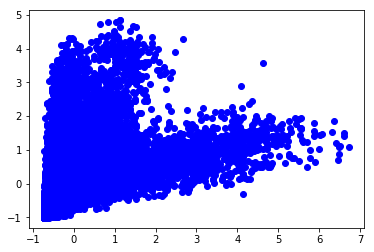

In [11]:
# se grafican los datos
x = data_m[:,0]
y = data_m[:,1]
plt.plot(x,y,'bo')

In [12]:
# se aplica DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data_m)

In [13]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [14]:
# Incluimos la función de la práctica anterior para calcular datos outliers.
# Para cada atributo ver los valores extremos. Se le pasa a la función el valor % para calcular los percentiles que
# delimiten los valores válidos y los outliers
def detectar_outliers(x, p):
    diccionario_ = {}
    atributos = x.keys()
    outlier_counts = defaultdict(lambda: 0)

    for atributo in atributos:
        values = x[atributo]
    
        # Calcular los percentiles
        P1 = np.percentile(values,p)
        P3 = np.percentile(values,100-p)
    
        # rango
        step = 1.5*(P3-P1)

        # conseguir indices de los outliers
        value_min = P1 - step
        value_max = P3 + step
        ioutliers = (values < value_min) | (values > value_max)

        # conseguir outliers
        outliers = x[ioutliers]
        diccionario_[atributo] = (value_min,value_max)
    
        # Ver los outliers detectados
        print ("Puntos considerados outliers para el atributo '{}':".format(atributo))
        display(outliers)    

        # añadir outliers al diccionario
        for i in outliers.index.values:
            outlier_counts[i] += 1
            
    return outliers

In [15]:
# se obtienen los datos outliers para cada uno de los atributos
outliers = detectar_outliers(data, 15)

Puntos considerados outliers para el atributo 'casual':


,casual,registered
2128,219,148.0
2129,240,109.0
2463,181,162.0
2465,179,209.0
2608,182,209.0
2610,180,246.0
2631,205,236.0
2632,197,223.0
2775,185,270.0
2776,184,268.0


Puntos considerados outliers para el atributo 'registered':


,casual,registered
11581,43,770.0
11916,104,769.0
11917,97,749.0
11940,133,719.0
11941,134,734.0
12060,69,716.0
12061,76,709.0
12252,83,756.0
12253,50,746.0
12276,85,742.0


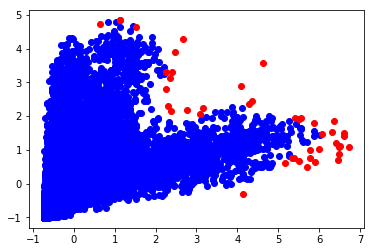

In [16]:
# se grafican los datos obtenidos con DBSCAN pintando en color diferente los datos outliers
plt.plot(x[core_samples==True],y[core_samples==True],'bo')
plt.plot(x[core_samples==False],y[core_samples==False],'ro')

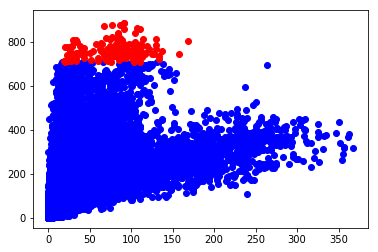

In [17]:
# se grafican los datos outliers obtenidos con la función de la práctica anterior
abnormal_indices = list(outliers.index)
data_out = data
data_out_m = data_out.as_matrix().astype("float32", copy = False)

df_tmp = data_out.drop(labels=abnormal_indices, axis=0)
normal_indices = list(df_tmp.index)

plt.scatter(data_out_m[normal_indices,0], data_out_m[normal_indices,1], c= 'b', )
plt.scatter(data_out_m[abnormal_indices,0], data_out_m[abnormal_indices,1], c= 'r')
plt.show()

#### Comentarios

Lo primero que hacemos es elimnar los atributos no continuos, y para realizar la representación gráfica nos quedamos con los dos atributos que vemos que mayor importancia tienen a la hora de representar los datos.

Se puede apreciar como con el uso de DBSCAN se obtienen unos resultados diferentes a la hora de considerar un punto como outlier si lo comparamos con la función de detección de outliers que hemos usado en la práctica anterior. Esto se debe a que DBSCAN es un método basado en la densidad que agrupa en conjuntos de una alta densidad separadas por regiones poco densas. Sin embargo la función que aplicamos para detectar outliers se basa en calcular para cada atributo a analizar, un percentil que deje % por debajo, basado en el reparto de los valores por atributo para separar los menos habituales.